# Phishing URL Detection


## Modules dan Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_hdf("/content/drive/MyDrive/Dataset Link Phising/cleaned_sites_urls.h5")

## Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,URL,Label
0,google.com,good
1,youtube.com,good
2,facebook.com,good
3,baidu.com,good
4,wikipedia.org,good


In [ ]:
data.shape

(2695622, 2)

In [ ]:
# Mengecek noise dan mendapatkan informasi mengenai daset
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
# Mendapatkan informasi
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2695622 entries, 0 to 2703404
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   URL     object
 1   Label   object
dtypes: object(2)
memory usage: 61.7+ MB


In [ ]:
# Checking the number of unique index values
unique_index_count = data.index.nunique()

# Checking the number of duplicate index values
duplicate_index_count = data.index.duplicated().sum()

print(f"Number of unique index values: {unique_index_count}")
print(f"Number of duplicate index values: {duplicate_index_count}")

Number of unique index values: 2695622
Number of duplicate index values: 0


In [ ]:
# Menampilkan sebagian kecil DataFrame
print(data.head())
print(data.tail())

# Memastikan tidak ada nilai hilang dalam index
missing_index_values = data.index.isnull().sum()
print(f"Jumlah nilai hilang dalam index: {missing_index_values}")

# Memastikan urutan index
index_ordered = data.index.is_monotonic_increasing
print(f"Apakah index berurutan meningkat: {index_ordered}")

             URL Label
0     google.com  good
1    youtube.com  good
2   facebook.com  good
3      baidu.com  good
4  wikipedia.org  good
                                                       URL Label
2703400        http://www.apple-prq-mdm.com/go.php?ssl=yes   bad
2703401  http://www.apple-prq-mdm.com/signin.html?Invit...   bad
2703402                         http://www.apple.qrlid.com   bad
2703403                     http://www.apple.qrlid.com/ios   bad
2703404  http://www.apple.ros.winxa.cn/mim/0pc7891es927...   bad
Jumlah nilai hilang dalam index: 0
Apakah index berurutan meningkat: True


In [ ]:
# Memeriksa duplikasi dalam data
duplicate_rows = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

# Menghitung jumlah total entries
total_entries = len(data)
print(f"Jumlah total entries: {total_entries}")


Jumlah baris duplikat: 93234
Jumlah total entries: 2695622


In [ ]:
# Menghapus baris duplikat
data_cleaned = data.drop_duplicates()

# Memeriksa kembali informasi DataFrame
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2602388 entries, 0 to 2703404
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   URL     object
 1   Label   object
dtypes: object(2)
memory usage: 59.6+ MB
None


In [ ]:
# Mereset index
data_cleaned.reset_index(drop=True, inplace=True)

# Memeriksa kembali informasi DataFrame setelah mereset index
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602388 entries, 0 to 2602387
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   URL     object
 1   Label   object
dtypes: object(2)
memory usage: 39.7+ MB
None


In [ ]:
# Menghitung jumlah 'good' dan 'bad'
label_counts = data['Label'].value_counts()

# Menampilkan hasil jumlah 'good' dan 'bad'
print("Jumlah 'good' dan 'bad':")
print(label_counts)

# Menghitung jumlah keseluruhan baris dalam dataset
total_rows = data.shape[0]

# Menghitung jumlah kolom dalam dataset
total_columns = data.shape[1]

# Mendapatkan nama-nama kolom
column_names = data.columns.tolist()

# Menampilkan jumlah keseluruhan baris
print(f"Jumlah keseluruhan baris dalam dataset: {total_rows}")

# Menampilkan jumlah kolom dalam dataset
print(f"Jumlah kolom dalam dataset: {total_columns}")

# Menampilkan nama-nama kolom
print("Nama-nama kolom dalam dataset:")
print(column_names)

Jumlah 'good' dan 'bad':
Label
good    1347811
bad     1347811
Name: count, dtype: int64
Jumlah keseluruhan baris dalam dataset: 2695622
Jumlah kolom dalam dataset: 2
Nama-nama kolom dalam dataset:
['URL', 'Label']


In [ ]:
# Membuat fungsi untuk mengubah label menjadi angka
def polaritas(teks):
  if teks =='good':
    return 1
  elif teks =='bad':
    return 0

In [ ]:
data['label_enc'] = data['Label'].apply(polaritas)

In [ ]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Good\t\t:', data[data.label_enc == 1].shape[0], 'data')
print('-- [0] Bad\t\t:', data[data.label_enc == 0].shape[0], 'data\n')

Total Jumlah url: 2695622 data

terdiri dari (label):
-- [1] Good		: 1347811 data
-- [0] Bad		: 1347811 data



#Visualisasi Data

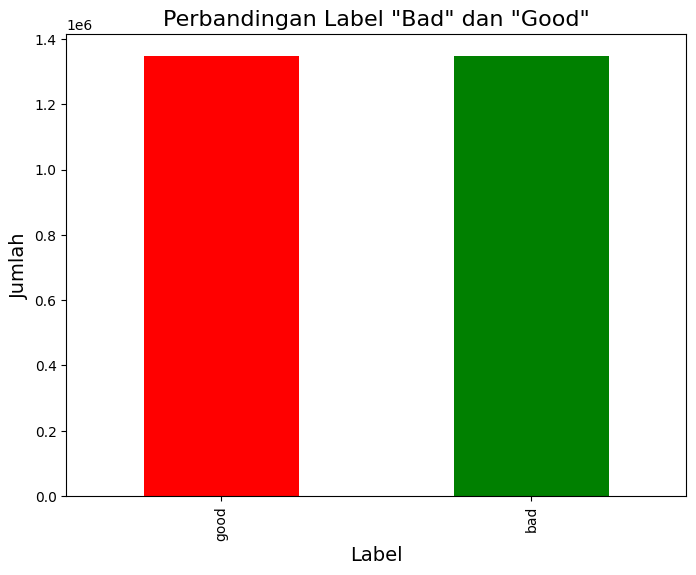

In [ ]:
# Membaca data dari file HDF5
df = pd.read_hdf('/content/drive/MyDrive/Dataset Link Phising/cleaned_sites_urls.h5', 'df')

# Menghitung jumlah data untuk setiap label
label_counts = df['Label'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['red', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Label "Bad" dan "Good"', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Menampilkan bar chart
plt.show()

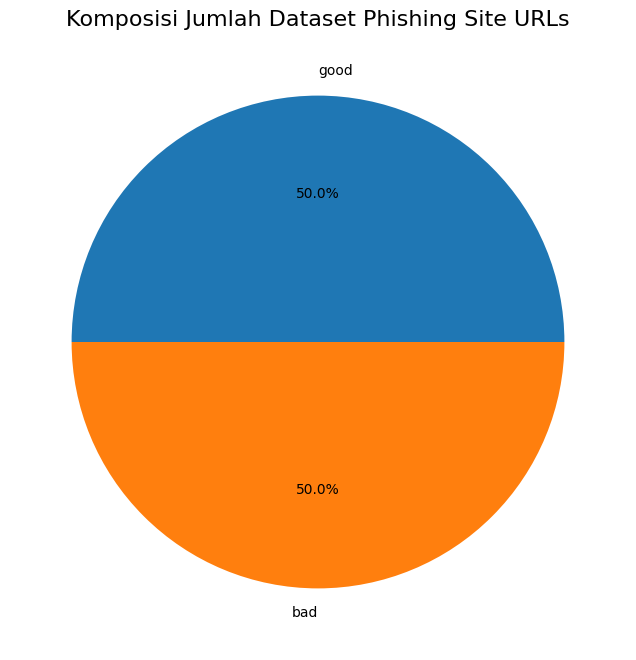

In [ ]:
# Membaca data dari file HDF5
df = pd.read_hdf('/content/drive/MyDrive/Dataset Link Phising/cleaned_sites_urls.h5', 'df')

# Menghitung jumlah data untuk setiap label
label_counts = df['Label'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.title('Komposisi Jumlah Dataset Phishing Site URLs', fontsize=16)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# Menampilkan pie chart
plt.show()

## Tokenisasi

In [ ]:
#Tokenisasi
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
tokenizer.tokenize(df['URL'][0]) # melakukan tokenisasi pada URL pertama di dataset

['google', 'com']

In [ ]:
# Tokenizing all the rows
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 12.73973534999999 sec


In [ ]:
df.sample(5)

,URL,Label,text_tokenized
2341354,http://selfautoverify.duckdns.org/f35cfdde301e...,bad,"[http, selfautoverify, duckdns, org, f, cfdde,..."
351217,farangdingdong.com,good,"[farangdingdong, com]"
900300,www.f0558156.xsph.ru,bad,"[www, f, xsph, ru]"
1519308,dodobooking.com/wp-content/themes/twentyfourte...,bad,"[dodobooking, com, wp, content, themes, twenty..."
2133652,http://235466987.ga/p/signin,bad,"[http, ga, p, signin]"


## Stemming

In [ ]:
# Mengubah ke bentuk kata dasar
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 185.13512181 sec


In [ ]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
767615,plus613.net,good,"[plus, net]","[plus, net]"
1609096,dominatetheplate.com/knby545,bad,"[dominatetheplate, com, knby]","[dominatethepl, com, knbi]"
1925903,http://hopomry.com/4f0c4cd3550bf88d38962a15460...,bad,"[http, hopomry, com, f, c, cd, bf, d, a, e, be...","[http, hopomri, com, f, c, cd, bf, d, a, e, be..."
311401,kintoresapuri.com,good,"[kintoresapuri, com]","[kintoresapuri, com]"
1367337,manta.com/c/mtx5p6x/dr-james-l-cochrane-md,good,"[manta, com, c, mtx, p, x, dr, james, l, cochr...","[manta, com, c, mtx, p, x, dr, jame, l, cochra..."


In [ ]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 1.4256799040000487 sec


In [ ]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
821427,www.f0519141.xsph.ru,bad,"[www, f, xsph, ru]","[www, f, xsph, ru]",www f xsph ru
821428,www.shprakserf.gq,bad,"[www, shprakserf, gq]","[www, shprakserf, gq]",www shprakserf gq
821434,service-mitld.firebaseapp.com/,bad,"[service, mitld, firebaseapp, com]","[servic, mitld, firebaseapp, com]",servic mitld firebaseapp com
821435,www.kuradox92.lima-city.de,bad,"[www, kuradox, lima, city, de]","[www, kuradox, lima, citi, de]",www kuradox lima citi de
821436,liuy-9a930.web.app/,bad,"[liuy, a, web, app]","[liuy, a, web, app]",liuy a web app


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,google.com,good,"[google, com]","[googl, com]",googl com
1,youtube.com,good,"[youtube, com]","[youtub, com]",youtub com
2,facebook.com,good,"[facebook, com]","[facebook, com]",facebook com
3,baidu.com,good,"[baidu, com]","[baidu, com]",baidu com
4,wikipedia.org,good,"[wikipedia, org]","[wikipedia, org]",wikipedia org


In [ ]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,google.com,good,"[google, com]","[googl, com]",googl com
1,youtube.com,good,"[youtube, com]","[youtub, com]",youtub com
2,facebook.com,good,"[facebook, com]","[facebook, com]",facebook com
3,baidu.com,good,"[baidu, com]","[baidu, com]",baidu com
4,wikipedia.org,good,"[wikipedia, org]","[wikipedia, org]",wikipedia org


## Feature Engineering

---



#Rumus Perhitungan TF - IDF

##Term Frequency (TF)

In [ ]:
# Converting text_sent column to list format
df['text_sent'] = df['text_sent'].apply(lambda x: x.split())

In [ ]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,google.com,good,"[google, com]","[googl, com]","[googl, com]"
1,youtube.com,good,"[youtube, com]","[youtub, com]","[youtub, com]"
2,facebook.com,good,"[facebook, com]","[facebook, com]","[facebook, com]"
3,baidu.com,good,"[baidu, com]","[baidu, com]","[baidu, com]"
4,wikipedia.org,good,"[wikipedia, org]","[wikipedia, org]","[wikipedia, org]"


In [ ]:
# convert list formatted string to list
import ast

def convert_text_list(texts):
    if isinstance(texts, str):
        return texts.split()  # Mengasumsikan texts adalah string yang dipisahkan oleh spasi
    return texts  # Jika sudah dalam bentuk list, tidak perlu diubah

df['text_sent'] = df['text_sent'].apply(convert_text_list)

print(df['text_sent'][0])
print("\ntype : ", type(df['text_sent'][0]))

['googl', 'com']

type :  <class 'list'>


In [ ]:
# Function to calculate term frequency (TF)
from collections import defaultdict

def calc_TF(document):
    # Count word frequencies in the document
    TF_dict = defaultdict(int)
    for word in document:  # Document is already a list of words
        TF_dict[word] += 1

    # Calculate tf for each word
    total_words = len(document)
    for word in TF_dict:
        TF_dict[word] /= total_words

    return dict(TF_dict)

# Calculate TF_dict for the DataFrame
df["TF_dict"] = df['text_sent'].apply(calc_TF)

# Display results
print(df["TF_dict"].head())

0        {'googl': 0.5, 'com': 0.5}
1       {'youtub': 0.5, 'com': 0.5}
2     {'facebook': 0.5, 'com': 0.5}
3        {'baidu': 0.5, 'com': 0.5}
4    {'wikipedia': 0.5, 'org': 0.5}
Name: TF_dict, dtype: object


In [ ]:
index = 0

print('%20s' % "term", "\t", "TF\n")
for key, value in df["TF_dict"][index].items():
    print('%20s' % key, "\t", value)


                term 	 TF

               googl 	 0.5
                 com 	 0.5


##Inverse Document Frequency (IDF)

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

In [ ]:
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# Check TF-IDF result
index = 0

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])


                term 	         TF 	              TF-IDF

               googl 	 0.5 	 3.076967916517335
                 com 	 0.5 	 0.3146558099035753


In [ ]:
# sort descending by value for DF dictionary
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(df["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.3146558099035753, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(df["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
0,com,265144.340111
1,http,157993.529558
5,org,132609.317345
3,www,131972.743963
13,net,117203.297474
17,ru,97918.515948
12,https,97896.306221
15,co,78891.773231
4,html,69348.243810
2,php,65013.545447


#TF IDF Vectorizer

In [ ]:
# Create and fit the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [ ]:
# # Convert list of tokens back to string
# df['text_sent'] = df['text_sent'].apply(lambda x: ' '.join(x))

In [ ]:
# Create and fit the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['text_sent'])

TfidfVectorizer()

In [ ]:
tfidf_features = tfidf_vectorizer.transform(df['text_sent'])  # Transformasikan semua teks yang telah ditokenisasi dan di-stemmed

In [ ]:
# Melihat ukuran matriks
tfidf_shape = tfidf_features.shape
print(tfidf_shape)
# Menampilkan ukuran matriks dengan label
print(f"Jumlah dokumen (baris): {tfidf_shape[0]}")
print(f"Jumlah fitur (kolom): {tfidf_shape[1]}")

(2695622, 1882615)
Jumlah dokumen (baris): 2695622
Jumlah fitur (kolom): 1882615


In [ ]:
# Konversi sparse matrix menjadi array untuk mencetak fitur yang telah digabungkan
print(tfidf_features[:5].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Mengonversi matriks sparse menjadi array NumPy
tfidf_array = tfidf_features.toarray()

In [ ]:
print(tfidf_array)

In [ ]:
# Save the fitted TfidfVectorizer to a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_and_evaluate_logistic_regression(features, labels, test_size=0.3, cv_splits=5):
    """
    Trains and evaluates a logistic regression model using cross-validation and train/test split.

    Parameters:
    - features: np.array or pd.DataFrame, the feature set.
    - labels: np.array or pd.Series, the labels.
    - test_size: float, the proportion of the dataset to include in the test split.
    - cv_splits: int, the number of splits for cross-validation.

    Returns:
    - cv_scores: array, the cross-validation scores.
    - mean_cv_score: float, the mean cross-validation score.
    - test_accuracy: float, the accuracy of the model on the test set.
    - cm: confusion matrix
    - class_report: classification report
    """
    # Splitting the data into training and test sets
    trainX, testX, trainY, testY = train_test_split(features, labels, test_size=test_size, random_state=42)

    # Setting up K-Fold cross-validation
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # Creating the logistic regression model
    lr = LogisticRegression(max_iter=1000)

    # Performing cross-validation
    cv_scores = cross_val_score(lr, features, labels, cv=kf)
    mean_cv_score = cv_scores.mean()

    # Training the model on the training set
    lr.fit(trainX, trainY)

    # Prediksi pada data pelatihan
    y_train_pred = lr.predict(trainX)

    # Hitung akurasi pada data pelatihan
    accuracy_train = accuracy_score(trainY, y_train_pred)


    # Evaluating the model on the test set
    test_predictions = lr.predict(testX)
    test_accuracy = accuracy_score(testY, test_predictions)

    # Compute confusion matrix
    cm = confusion_matrix(testY, test_predictions)

    # Get unique class names
    unique_labels = np.unique(labels)
    target_names = [str(label) for label in unique_labels]

    # Classification report
    class_report = classification_report(testY, test_predictions, target_names=target_names)

    return cv_scores, mean_cv_score, test_accuracy, cm, class_report,lr,accuracy_train

#Evaluation & Validation

•	`test_size=0.3` berarti 30% data dialokasikan untuk set pengujian, sementara 70% sisanya untuk set pelatihan.

In [ ]:
# Assuming tfidf_features and data.label_enc are already defined
cv_scores, mean_cv_score, test_accuracy, cm, class_report, lr, accuracy_train = train_and_evaluate_logistic_regression(tfidf_features, data.label_enc, test_size=0.3, cv_splits=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {mean_cv_score}")
print(f"Test set accuracy: {test_accuracy}")

Cross-validation scores: [0.97362578 0.97351449 0.9738038  0.97364243 0.97351444]
Mean cross-validation score: 0.9736201886244078
Test set accuracy: 0.9730872389441156


In [ ]:
#Hasil data train proporsi data 70:30
from sklearn.metrics import accuracy_score
print(f'Akurasi data pelatihan: {accuracy_train}')

Akurasi data pelatihan: 0.9774152262796546


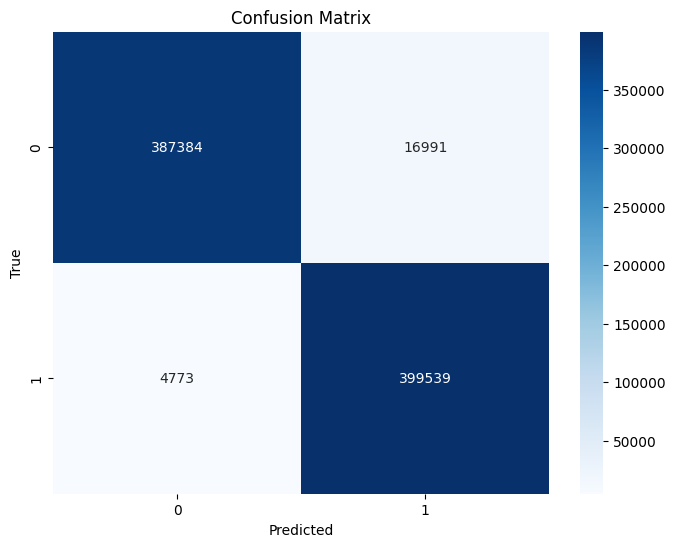

In [ ]:
# Visualize confusion matrix using a heatmap
#class_names = data.label_enc
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    404375
           1       0.96      0.99      0.97    404312

    accuracy                           0.97    808687
   macro avg       0.97      0.97      0.97    808687
weighted avg       0.97      0.97      0.97    808687



In [ ]:
from joblib import dump
joblib.dump(lr, "model_phishing_lr.joblib")

['model_phishing_lr.joblib']

#Proporsi 60:40

•	Test_size = 0.4 berarti 40 % data dialokasikan untuk set pengujian, sementara 60% sisanya untuk set pelatihan

In [ ]:
# Assuming tfidf_features and data.label_enc are already defined
cv_scores, mean_cv_score, test_accuracy, cm, class_report, lr, accuracy_train = train_and_evaluate_logistic_regression(tfidf_features, data.label_enc, test_size=0.4, cv_splits=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {mean_cv_score}")
print(f"Test set accuracy: {test_accuracy}")

Cross-validation scores: [0.97362393 0.97351449 0.97381122 0.97364799 0.97352372]
Mean cross-validation score: 0.9736242693189624
Test set accuracy: 0.9721965890995493


In [ ]:
#Hasil data train dengan proporsi data 60:40
from sklearn.metrics import accuracy_score
print(f'Akurasi data pelatihan: {accuracy_train}')

Akurasi data pelatihan: 0.9769267818864295


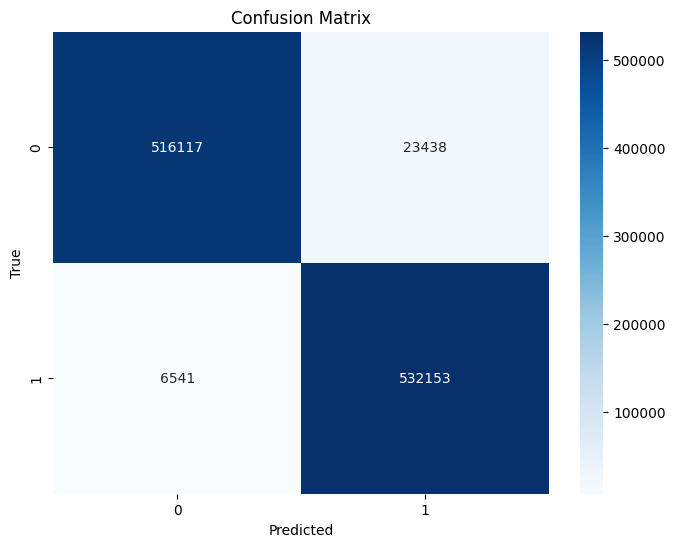

In [ ]:
# Visualize confusion matrix using a heatmap
#class_names = data.label_enc
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    539555
           1       0.96      0.99      0.97    538694

    accuracy                           0.97   1078249
   macro avg       0.97      0.97      0.97   1078249
weighted avg       0.97      0.97      0.97   1078249



In [ ]:
# Menyimpan model yang telah dilatih ke dalam file
# with open('trained_model.pickle', 'wb') as output:
#     pickle.dump(lr, output)

In [ ]:
# Mendapatkan parameter β dan intercept
beta = lr.coef_
intercept = lr.intercept_

print("Koefisien β:", beta)
print("Intercept:", intercept)

Koefisien β: [[-4.47402922e+00 -1.99877859e+00 -6.57998435e-01 ... -3.77201957e-03
  -7.76670829e-01 -2.41298203e-01]]
Intercept: [1.40946589]


#Conffusion matrix dengan data aktual

In [ ]:
import pandas as pd
data = pd.read_csv("/content/dataset_B_05_2020.csv", delimiter=';')

In [ ]:
df = pd.DataFrame(data)
print(df)

                                                     URL Label
0      http://shadetreetechnology.com/V4/validation/a...   Bad
1      https://support-appleld.com.secureupdate.duila...   Bad
2                       http://appleid.apple.com-app.es/   Bad
3      http://www.shadetreetechnology.com/V4/validati...   Bad
4                        http://html.house/l7ceeid6.html   Bad
...                                                  ...   ...
11155  https://www.thefreedictionary.com/select+commi...  Good
11156     https://www.onecklace.com/fingerprint-jewelry/  Good
11157                    https://www.facebook.com/savers  Good
11158     https://www.answers.com/Q/Digital_media_salary  Good
11159               https://chicowhitaker.wordpress.com/  Good

[11160 rows x 2 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     11160 non-null  object
 1   Label   11160 non-null  object
dtypes: object(2)
memory usage: 174.5+ KB


In [ ]:
df.shape

(11160, 2)

In [ ]:
# Membuat fungsi untuk mengubah label menjadi angka
def polaritas(teks):
  if teks =='Good':
    return 1
  elif teks =='Bad':
    return 0

df['label_enc'] = df['Label'].apply(polaritas)

print('Total Jumlah url:', df.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Good\t\t:', df[df.label_enc == 1].shape[0], 'data')
print('-- [0] Bad\t\t:', df[df.label_enc == 0].shape[0], 'data\n')

Total Jumlah url: 11160 data

terdiri dari (label):
-- [1] Good		: 5701 data
-- [0] Bad		: 5459 data



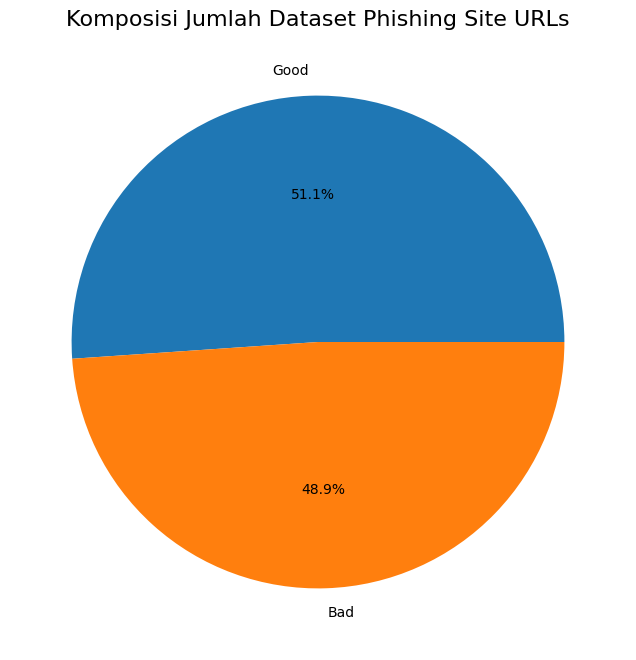

In [ ]:
import matplotlib.pyplot as plt
# Menghitung jumlah data untuk setiap label
label_counts = df['Label'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.title('Komposisi Jumlah Dataset Phishing Site URLs', fontsize=16)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# Menampilkan pie chart
plt.show()

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Tokenisasi
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
tokenizer.tokenize(df['URL'][0]) # melakukan tokenisasi pada URL pertama di dataset

['http',
 'shadetreetechnology',
 'com',
 'V',
 'validation',
 'a',
 'aedc',
 'ae',
 'eabcfa',
 'e',
 'a',
 'a']

In [ ]:
import time
# Tokenizing all the rows
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.06815380699998741 sec


In [ ]:
df.sample(5)

,URL,Label,label_enc,text_tokenized
10945,https://www.bls.gov/oes/current/oes292035.htm,Good,1,"[https, www, bls, gov, oes, current, oes, htm]"
10204,https://www.macococosmetics.com/webservices/user/,Good,1,"[https, www, macococosmetics, com, webservices..."
6827,https://betasus23.blogspot.com,Good,1,"[https, betasus, blogspot, com]"
6969,https://support-appleld.com.secureupdate.duila...,Good,1,"[https, support, appleld, com, secureupdate, d..."
8760,https://hortipower.co.uk/recepit46/customer_ce...,Good,1,"[https, hortipower, co, uk, recepit, customer,..."


In [ ]:
# Mengubah ke bentuk kata dasar
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 4.122205139999949 sec


In [ ]:
df.sample(5)

,URL,Label,label_enc,text_tokenized,text_stemmed
10646,https://phytoger.com/sa//?sec=LeaHoffmann,Good,1,"[https, phytoger, com, sa, sec, LeaHoffmann]","[https, phytog, com, sa, sec, leahoffmann]"
2999,https://paypal-express-checkout.danielschreurs...,Bad,0,"[https, paypal, express, checkout, danielschre...","[https, paypal, express, checkout, danielschre..."
1442,https://fgoten-mole.web.app/,Bad,0,"[https, fgoten, mole, web, app]","[https, fgoten, mole, web, app]"
1662,https://sites.google.com/site/libretyreserve/,Bad,0,"[https, sites, google, com, site, libretyreserve]","[https, site, googl, com, site, libretyreserv]"
2645,http://0s.nrxwo2lo.ozvs4y3pnu.cmla.ru/?act=login,Bad,0,"[http, s, nrxwo, lo, ozvs, y, pnu, cmla, ru, a...","[http, s, nrxwo, lo, ozv, y, pnu, cmla, ru, ac..."


In [ ]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.010959893000006105 sec


In [ ]:
bad_sites = df[df.Label == 'Bad']
good_sites = df[df.Label == 'Good']

In [ ]:
bad_sites.head()

,URL,Label,label_enc,text_tokenized,text_stemmed,text_sent
0,http://shadetreetechnology.com/V4/validation/a...,Bad,0,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
1,https://support-appleld.com.secureupdate.duila...,Bad,0,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
2,http://appleid.apple.com-app.es/,Bad,0,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
3,http://www.shadetreetechnology.com/V4/validati...,Bad,0,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
4,http://html.house/l7ceeid6.html,Bad,0,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [ ]:
good_sites.head()

,URL,Label,label_enc,text_tokenized,text_stemmed,text_sent
5459,https://shadetreetechnology.com/V4/validation/...,Good,1,"[https, shadetreetechnology, com, V, validatio...","[https, shadetreetechnolog, com, v, valid, a, ...",https shadetreetechnolog com v valid a aedc ae...
5460,https://support-appleld.com.secureupdate.duila...,Good,1,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
5461,https://appleid.apple.com-app.es/,Good,1,"[https, appleid, apple, com, app, es]","[https, appleid, appl, com, app, es]",https appleid appl com app es
5462,https://www.shadetreetechnology.com/V4/validat...,Good,1,"[https, www, shadetreetechnology, com, V, vali...","[https, www, shadetreetechnolog, com, v, valid...",https www shadetreetechnolog com v valid ba b ...
5463,https://html.house/l7ceeid6.html,Good,1,"[https, html, house, l, ceeid, html]","[https, html, hous, l, ceeid, html]",https html hous l ceeid html


In [ ]:
df.head()

,URL,Label,label_enc,text_tokenized,text_stemmed,text_sent
0,http://shadetreetechnology.com/V4/validation/a...,Bad,0,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
1,https://support-appleld.com.secureupdate.duila...,Bad,0,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
2,http://appleid.apple.com-app.es/,Bad,0,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
3,http://www.shadetreetechnology.com/V4/validati...,Bad,0,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
4,http://html.house/l7ceeid6.html,Bad,0,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [ ]:
import pickle

with open('/content/tfidf_vectorizer.pkl', 'rb') as vectorizer_handle:
    tfidf_vectorizer = pickle.load(vectorizer_handle)

In [ ]:
# Assuming tfidf_vectorizer is already fitted
X_transformed = tfidf_vectorizer.transform(df['text_sent'])

In [ ]:
X = X_transformed
y = df['label_enc']

In [ ]:
import joblib

# Load the model from the file
model = joblib.load('/content/model_phishing_lr.joblib')

# Now you can use the loaded model to make predictions
predictions = model.predict(X)

In [ ]:
 # Evaluating the model on the test set
    test_predictions = lr.predict(testX)
    test_accuracy = accuracy_score(testY, test_predictions)

    # Compute confusion matrix
    cm = confusion_matrix(testY, test_predictions)
     # Classification report
    class_report = classification_report(testY, test_predictions, target_names=target_names)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions, average='binary')
recall = recall_score(y, predictions, average='binary')
f1 = f1_score(y, predictions, average='binary')
classification_report_str = classification_report(y, predictions)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:')
print(classification_report_str)

Accuracy: 0.7617383512544803
Precision: 0.7543478260869565
Recall: 0.7912646904051921
F1 Score: 0.7723653796763976

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5459
           1       0.75      0.79      0.77      5701

    accuracy                           0.76     11160
   macro avg       0.76      0.76      0.76     11160
weighted avg       0.76      0.76      0.76     11160



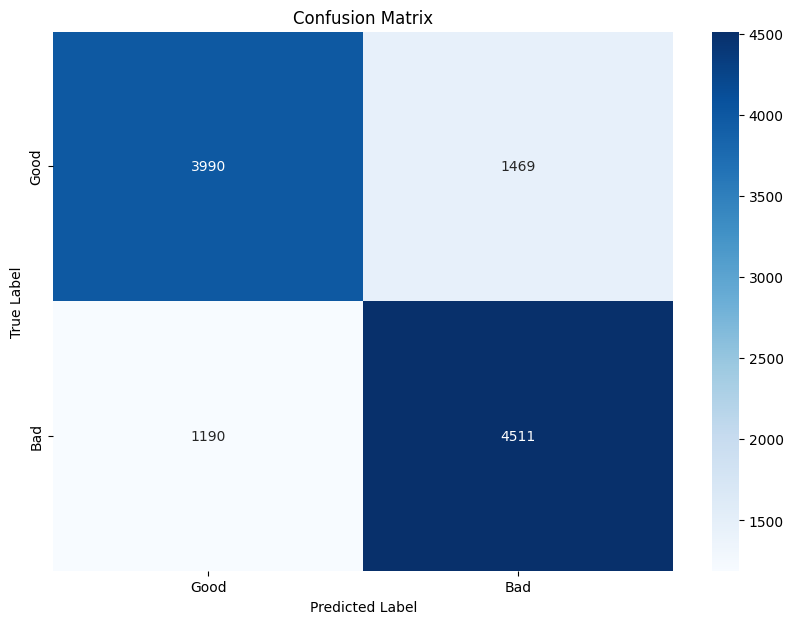

In [ ]:
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Feature Learning

In [ ]:
# Menampilkan bobot fitur yang dipelajari oleh model
# feature_names_cv = cv.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
# feature_names_hash = ['hash_' + str(i) for i in range(hash_features.shape[1])]

# feature_names_combined = np.concatenate((feature_names_cv, feature_names_tfidf, feature_names_hash))
coefficients = lr.coef_.flatten()

# Membuat DataFrame untuk menampilkan fitur dan bobotnya
feature_importance = pd.DataFrame({
    'Feature': feature_names_tfidf,
    'Coefficient': coefficients
})

# Mengurutkan fitur berdasarkan bobot absolut
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

print(feature_importance)


                Feature  Coefficient  AbsCoefficient
717948             http   -90.498902       90.498902
718065            https    27.297113       27.297113
947566            login   -21.158800       21.158800
432665           duckdn   -19.826399       19.826399
1783823             www   -18.348928       18.348928
...                 ...          ...             ...
547784            fjjop     0.000000        0.000000
1290556  promoargentina     0.000000        0.000000
1290557        promoart     0.000000        0.000000
1290558       promoavon     0.000000        0.000000
980394           malsup     0.000000        0.000000

[1882615 rows x 3 columns]


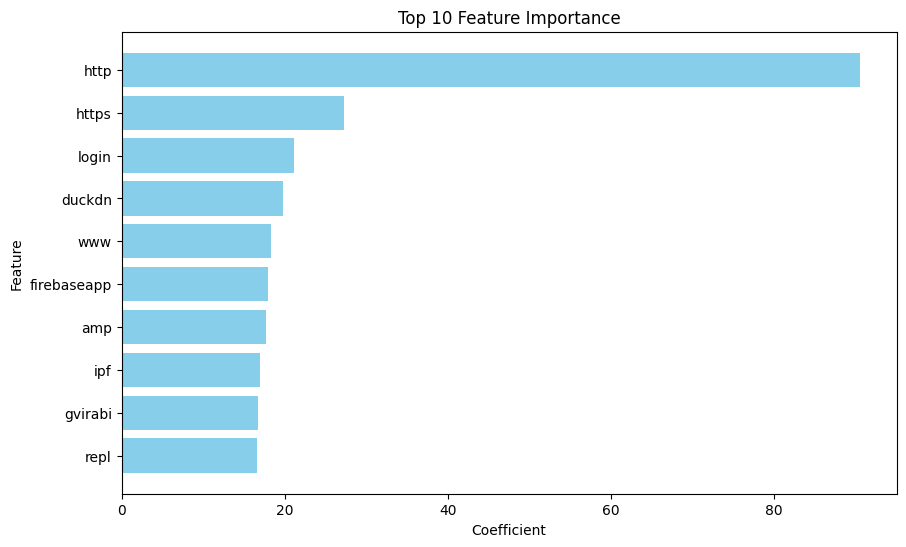

In [ ]:
# Ambil 10 fitur teratas
top_features = feature_importance.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['AbsCoefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

#Rumus Perhitungan Logistic Reggression

## Link Good

###TF-IDF norm=l2

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "https://siakad.umj.ac.id/",
    "https://example.com/",
    "https://example.edu/"
]

vectorizer = TfidfVectorizer(norm=None)
X = vectorizer.fit_transform(corpus).toarray()
print(X)


[[1.69314718 0.         0.         0.         1.         1.69314718
  1.69314718 1.69314718]
 [0.         1.69314718 0.         1.28768207 1.         0.
  0.         0.        ]
 [0.         0.         1.69314718 1.28768207 1.         0.
  0.         0.        ]]


###TF - IDF Norm =l1 Link Good

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Data
corpus = ["https://siakad.umj.ac.id/"]

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transformasi teks menjadi vektor fitur TF-IDF
X = vectorizer.fit_transform(corpus).toarray()

# Print feature names and shape of X
print("Feature names:", vectorizer.get_feature_names_out())
print("Shape of X:", X.shape)

# Koefisien β dan intercept
beta = np.array([1.04343196] * X.shape[1])  # Adjust beta to match the number of features
intercept =  0.5217159801053967

# Menghitung z
z = intercept + np.dot(X, beta)

# Menghitung pi(x_i)
pi = 1 / (1 + np.exp(-z))

print("pi(x_i):", pi)

# Menghitung g(x_i)
g = np.log(pi / (1 - pi))
print("g(x_i):", g)

# Label sebenarnya
y = np.array([1])

# Menghitung L(beta) (Log Loss)
L = - (y * np.log(pi) + (1 - y) * np.log(1 - pi))

print("L(beta):", L)


Feature names: ['ac' 'https' 'id' 'siakad' 'umj']
Shape of X: (1, 5)
pi(x_i): [0.94557146]
g(x_i): [2.85490077]
L(beta): [0.05596582]


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["https://siakad.umj.ac.id/"]
vectorizer = TfidfVectorizer(norm='l1')
X = vectorizer.fit_transform(corpus).toarray()

print(X)
print(vectorizer.get_feature_names_out())

[[0.2 0.2 0.2 0.2 0.2]]
['ac' 'https' 'id' 'siakad' 'umj']


In [ ]:
import numpy as np

# Data
X = np.array([
    [0,2, 0,2, 0,2, 0,2, 0,2],
])
y = np.array([1])  # Label, corresponding to one sample

# Parameter initialization
beta = np.zeros(X.shape[1])
b0 = 0
learning_rate = 0.1
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for epoch in range(epochs):
    z = np.dot(X, beta) + b0
    predictions = sigmoid(z)

    # Error
    error = y - predictions

    # Update parameter
    beta += learning_rate * np.dot(X.T, error)
    b0 += learning_rate * error.sum()

print("Koefisien β:", beta)
print("Intercept:", b0)

Koefisien β: [0.         0.72858554 0.         0.72858554 0.         0.72858554
 0.         0.72858554 0.         0.72858554]
Intercept: 0.36429276963388435


In [ ]:
import numpy as np

# Koefisien beta, intercept, dan fitur x
beta = np.array([0.72858554, 0.72858554, 0.72858554, 0.72858554, 0.72858554])
intercept = 0.36429276963388435
x = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Menghitung logit
logit = intercept + np.dot(beta, x)
print(f"Logit: {logit}")

Logit: 1.0928783096338845


In [ ]:
# Menghitung probabilitas menggunakan fungsi sigmoid
probabilitas = 1 / (1 + np.exp(-logit))
print(f"Probabilitas: {probabilitas}")

Probabilitas: 0.7489233384923725


In [ ]:
# Menghitung log loss untuk label y = 1
y = 1
log_loss = - (y * np.log(probabilitas) + (1 - y) * np.log(1 - probabilitas))
print(f"Log Loss: {log_loss}")

Log Loss: 0.2891186525158086


#Link Bad

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php"]
vectorizer = TfidfVectorizer(norm='l1')
X = vectorizer.fit_transform(corpus).toarray()

print(X)
print(vectorizer.get_feature_names_out())

[[0.08333333 0.08333333 0.16666667 0.08333333 0.08333333 0.16666667
  0.08333333 0.08333333 0.08333333 0.08333333]]
['admin' 'alibaba' 'com' 'js' 'jsp' 'login' 'php' 'tr' 'wp' 'yeniik']


In [ ]:
import numpy as np

# Data
X = np.array([
    [0.08333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333, 0.16666667,
  0.08333333, 0.08333333, 0.08333333, 0.08333333],
])
y = np.array([0])  # Label, corresponding to one sample

# Parameter initialization
beta = np.zeros(X.shape[1])
b0 = 0
learning_rate = 1.0
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for epoch in range(epochs):
    z = np.dot(X, beta) + b0
    predictions = sigmoid(z)

    # Error
    error = y - predictions

    # Update parameter
    beta += learning_rate * np.dot(X.T, error)
    b0 += learning_rate * error.sum()

print("Koefisien β:", beta)
print("Intercept:", b0)

Koefisien β: [-0.52581959 -0.52581959 -1.05163924 -0.52581959 -0.52581959 -1.05163924
 -0.52581959 -0.52581959 -0.52581959 -0.52581959]
Intercept: -6.3098353148031885


In [ ]:
import numpy as np

# Label sebenarnya
y = np.array([0])

# Koefisien beta, intercept, dan fitur x
beta = np.array([-0.52581959, -0.52581959, -1.05163924, -0.52581959, -0.52581959, -1.05163924, -0.52581959, -0.52581959, -0.52581959, -0.52581959])
intercept = -6.3098353148031885
x = np.array([0.08333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333, 0.08333333, 0.08333333])


In [ ]:
# Menghitung logit
logit = intercept + np.dot(beta, x)
print(f"Logit: {logit}")

Logit: -7.0109281144589275


In [ ]:
# Menghitung probabilitas menggunakan fungsi sigmoid
probabilitas = 1 / (1 + np.exp(-logit))
print(f"Probabilitas: {probabilitas}")

Probabilitas: 0.000901158248741845


In [ ]:
# Menghitung log loss untuk label y = 1
y = 0
log_loss = - (y * np.log(probabilitas) + (1 - y) * np.log(1 - probabilitas))
print(f"Log Loss: {log_loss}")

Log Loss: 0.6657551551338734


# Try to predict

In [ ]:
import joblib
import numpy as np

# Load the TF-IDF vectorizer and the logistic regression model
tfidf_vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')
loaded_model = joblib.load('/content/model_phishing_lr.joblib')

predict_urls = [
    'https://sfr-suivi-client.com/login.php',
    'http://sfr-suivi-client.com/',
    'https://sandiko.space/pl/millenium/login/',
    'http://epobaazmmm.duckdns.org',
    'https://www.facebook.com/',
    'https://youtube.com/',
    'https://www.kaggle.com/code/ashishkumarbehera/phishing-site-prediction',
    'https://restorevisioncenters.com/html/technology.html',
    'https://colab.research.google.com/drive/1jm9nHuJor4sn3LBD8a9JmeqSGsXWbr5T#scrollTo=7e68cb43'
]

# Transform URLs
tfidf_features = tfidf_vectorizer.transform(predict_urls)

# Predict using the loaded model
results = loaded_model.predict(tfidf_features)
print("URLs:", predict_urls)
print("Predictions:", results)


URLs: ['https://sfr-suivi-client.com/login.php', 'http://sfr-suivi-client.com/', 'https://sandiko.space/pl/millenium/login/', 'http://epobaazmmm.duckdns.org', 'https://www.facebook.com/', 'https://youtube.com/', 'https://www.kaggle.com/code/ashishkumarbehera/phishing-site-prediction', 'https://restorevisioncenters.com/html/technology.html', 'https://colab.research.google.com/drive/1jm9nHuJor4sn3LBD8a9JmeqSGsXWbr5T#scrollTo=7e68cb43']
Predictions: [0 0 1 0 1 1 1 1 1]


In [ ]:
from joblib import load
import numpy as np
tfidf_vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')
loaded_model = load('/content/model_phishing_lr.joblib')

predict_urls = [
    'https://drive.google.com/drive/folders/1jWmhh1alAp3EPBRsnoRwRrOAU5L-0_YD'
]

# Transform URLs
tfidf_features = tfidf_vectorizer.transform(predict_urls)

# Predict using the loaded model
results = loaded_model.predict(tfidf_features)
print("URLs:", predict_urls)
print("Predictions:", results)

URLs: ['https://drive.google.com/drive/folders/1jWmhh1alAp3EPBRsnoRwRrOAU5L-0_YD']
Predictions: [1]
